In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


In [3]:
filename = 'X_train_face.csv'
X_train = open(filename, 'rt')
XTrain1 = np.loadtxt(X_train, dtype=int, delimiter=",",skiprows=1)
print(XTrain1.shape)
filename = 'Y_train_face.csv'
Y_train1 = open(filename, 'rt')
YTrain2 = np.loadtxt(Y_train1, dtype=int,delimiter=",",skiprows=1)
YTrain3=YTrain2.reshape(28709,1)
YTrain4=YTrain3.T
print(YTrain4.shape)
filename = 'Xtest_facev1.csv'
X_test = open(filename, 'rt')
XTest1 = np.loadtxt(X_test, dtype=int, delimiter=",",skiprows=1)
print(XTest1.shape)


(28709, 2304)
(1, 28709)
(3589, 2304)


In [5]:
XTrain2=XTrain1.reshape(XTrain1.shape[0],48,48,1)
YTrain5=YTrain4.T
XTrain3=XTrain2/255
Y_train6 = np.eye(7)[YTrain5.reshape(-1)].T

YTrain7=Y_train6.T

print(YTrain7.shape)

(28709, 7)


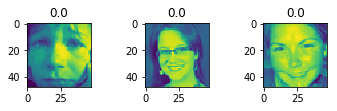

In [6]:
for i in range(6,9):
    plt.subplot(330+(i+1))
    plt.imshow(XTrain3[i,:,:,0])
    plt.title(YTrain7[i,0]);

In [7]:
def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    ### START CODE HERE ###
    # Feel free to use the suggested outline in the text above to get started, and run through the whole
    # exercise (including the later portions of this notebook) once. The come back also try out other
    # network architectures as well. 
    X_input = Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool1')(X)
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv5')(X)
    X = BatchNormalization(axis = 3, name = 'bn5')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool2')(X)
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv6')(X)
    X = BatchNormalization(axis = 3, name = 'bn6')(X)
    X = Activation('relu')(X)
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv3')(X)
    X = Dropout(0.25)(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    X = Flatten()(X)
    X = Dense(7, activation='softmax', name='fc')(X)
    ### END CODE HERE ###
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    return model

In [8]:
happyModel = HappyModel((48,48,1))

In [9]:
happyModel.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["acc"])

In [ ]:
None
happyModel.fit(x = XTrain3, y = YTrain7, epochs = 10, batch_size = 12)

Epoch 1/10
28709/28709 [==============================] - 1471s 51ms/step - loss: 1.6727 - acc: 0.3340
Epoch 2/10
28709/28709 [==============================] - 1345s 47ms/step - loss: 1.4382 - acc: 0.4381
Epoch 3/10
28709/28709 [==============================] - 1337s 47ms/step - loss: 1.3142 - acc: 0.4980
Epoch 4/10
 8808/28709 [========>.....................] - ETA: 15:02 - loss: 1.2509 - acc: 0.5175

In [55]:
XTest1=XTest1/255

(28709, 2304)


In [57]:
happyModel.predict(XTest1)
np.savetxt("foo.csv", Y_test, delimiter=",")

ValueError: could not convert string to float: 